In [149]:
import glob
import pandas as pd
import sys
import re
import os
import pickle
import gzip

import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, hamming_loss
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import scipy

import nltk
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [197]:
#df=pd.read_csv('new_training_set.csv',names=['Title','Brand_1','Size','Original_Price','Current_Price','Last Bump','Flag'])

#df=pd.read_csv('new_training_set_v.csv')

df=pd.read_csv('Expanded_Grailed_Data.csv')

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31116 entries, 0 to 31115
Data columns (total 9 columns):
ID            31116 non-null int64
Title         31116 non-null object
Brand         31116 non-null object
Size          31116 non-null object
Curr_Price    31116 non-null object
Init_Price    31116 non-null object
Listed_At     31116 non-null object
Bumped_At     5926 non-null object
Flag          31116 non-null int64
dtypes: int64(2), object(7)
memory usage: 2.1+ MB


In [199]:
df.describe()

,ID,Flag
count,31116.000000,31116.000000
mean,15557.500000,0.088700
std,8982.559824,0.284315
min,0.000000,0.000000
25%,7778.750000,0.000000
50%,15557.500000,0.000000
75%,23336.250000,0.000000
max,31115.000000,1.000000


In [200]:
brand_list=[]

In [201]:
for item in df['Brand'].str.split(' × '):
    brand_list=brand_list+[x for x in item if len(x)>2]

In [202]:
brand_list=list(set(brand_list))

In [204]:
for brand in brand_list:
    
    df[brand] = df.apply(lambda r: 1 if brand in r['Brand'].split(' × ') else 0,axis = 1)

In [205]:
df.head()

,ID,Title,Brand,Size,Curr_Price,Init_Price,Listed_At,Bumped_At,Flag,Surface To Air,...,Goretex,Sanders,Acro,Alexander McQueen,Gosha Rubchinskiy,Katharine Hamnett,Base Control,ROEN,Mezlan,Disney
0,0,Blake Griffin Los Angeles Clippers Jersey,Adidas × Nba,s,$35.00,$35.00,17 mins ago,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,SHIRT S/S 2013 Archival T-Shirt,Comme des Garcons,l,$188.00,$188.00,18 mins ago,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,WTB WACKO MARIA X UNION SHIRT,Union × Wacko Maria,xl,$1.00,$1.00,18 mins ago,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Ramones low,Rick Owens,8.5,$500.00,$500.00,19 mins ago,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Box Logo HBA shirt,Hood By Air,m,$235.00,$235.00,20 mins ago,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


['Alexander McQueen', 'Neighborhood', 'Alyx', 'Julius', 'Balmain', 'Moncler', 'Dries Van Noten', 'Issey Miyake', 'Needles', 'Comme Des Garcons Play', 'Burberry', 'Jordan Brand', 'Common Projects', 'John Elliott', 'Fendi', 'Vetements', 'Versace', 'Cav Empt', 'Dolce & Gabbana', 'Y-3', 'Fear of God', 'A.P.C.', 'Rick Owens Drkshdw', 'Chrome Hearts', 'Visvim', 'Yohji Yamamoto', 'Junya Watanabe', 'Gosha Rubchinskiy', 'Nike', 'Givenchy', 'Adidas', 'Helmut  Lang', 'Dior', 'Prada', 'Stone Island', 'Balenciaga', 'Acne Studios', 'Supreme', 'Rick Owens', 'Number (N)ine', 'Maison Margiela', 'Louis Vuitton', 'Comme Des Garcons Homme Plus', 'Raf Simons', 'Undercover', 'Bape', 'Off-White', 'Saint Laurent Paris', 'Comme des Garcons', 'Gucci']


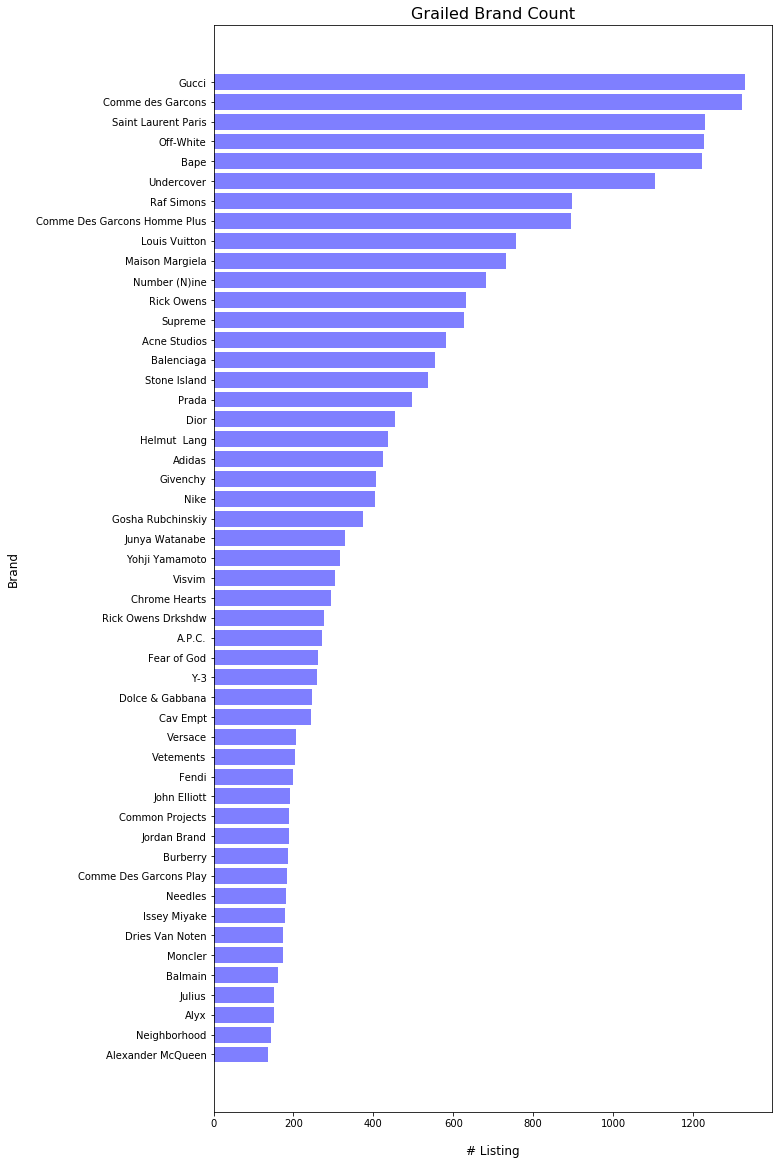

In [206]:
def brandPlot(df,brands):
    
    # get only the binary tags
    df_brands = df[brands]
    
    # we want to collect the sum of each column
    brandCount = {}
    
    for brand in brands:
        
        count = sum(df[brand])
        brandCount[brand] = count
            
    # sort decreasing
    xlabels = [key for key in sorted(brandCount, key = brandCount.get)][-50:]
    print(xlabels[-50:])
    sums = [brandCount[brand] for brand in xlabels]
    
    x_pos = np.arange(len(xlabels))
    
    # plotting
    plt.figure(figsize=(10,20))
    plt.barh(x_pos, sums, align='center', alpha=0.5, color = 'b')
    
    plt.yticks(x_pos, xlabels)
    plt.xlabel('# Listing', fontsize = 12, labelpad=16)
    plt.ylabel('Brand', fontsize = 12, labelpad=16)
    plt.title('Grailed Brand Count', fontsize = 16)
    plt.show()
    return dict(zip(xlabels,sums))
    
    
brand_counts = brandPlot(df,brand_list)

In [207]:
df.to_pickle('./models/grailed_full.pkl')

In [208]:
df.head(5)

,ID,Title,Brand,Size,Curr_Price,Init_Price,Listed_At,Bumped_At,Flag,Surface To Air,...,Goretex,Sanders,Acro,Alexander McQueen,Gosha Rubchinskiy,Katharine Hamnett,Base Control,ROEN,Mezlan,Disney
0,0,Blake Griffin Los Angeles Clippers Jersey,Adidas × Nba,s,$35.00,$35.00,17 mins ago,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,SHIRT S/S 2013 Archival T-Shirt,Comme des Garcons,l,$188.00,$188.00,18 mins ago,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,WTB WACKO MARIA X UNION SHIRT,Union × Wacko Maria,xl,$1.00,$1.00,18 mins ago,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Ramones low,Rick Owens,8.5,$500.00,$500.00,19 mins ago,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Box Logo HBA shirt,Hood By Air,m,$235.00,$235.00,20 mins ago,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
from sklearn.cross_validation import train_test_split
X=df[brand_list]
y=df['Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23337, 1493)
(7779, 1493)
(23337,)
(7779,)


In [210]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [211]:
%time nb.fit(X_train, y_train)

CPU times: user 279 ms, sys: 155 ms, total: 434 ms
Wall time: 332 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [212]:
y_pred_class = nb.predict(X_test)

In [214]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.91721300938423966

In [215]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [216]:
%time logreg.fit(X_train, y_train)

CPU times: user 609 ms, sys: 158 ms, total: 767 ms
Wall time: 779 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [217]:
y_pred_class_l = logreg.predict(X_test)

In [218]:
metrics.accuracy_score(y_test, y_pred_class_l)

0.92196940480781586

In [219]:
feature_list=brand_list

In [220]:
feature_list.append('Title')

In [221]:
from sklearn.cross_validation import train_test_split
X=df[feature_list]
y=df['Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23337, 1494)
(7779, 1494)
(23337,)
(7779,)


In [222]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
count_vect = CountVectorizer()
title_matrix_train = count_vect.fit_transform(X_train.Title)
title_matrix_train = tfidf_transformer.fit_transform(title_matrix_train)
title_matrix_train.shape

(23337, 9732)

In [230]:
brand_matrix_train=scipy.sparse.csr_matrix(X_train[brand_list].values)

In [231]:
combined_matrix_train=scipy.sparse.hstack([title_matrix_train,brand_matrix_train])

In [232]:
combined_matrix_train

<23337x11225 sparse matrix of type '<class 'numpy.float64'>'
	with 146227 stored elements in COOrdinate format>

In [233]:
clf2 = MultinomialNB()

In [234]:
%time clf2.fit(combined_matrix_train, y_train)

CPU times: user 31.4 ms, sys: 15.6 ms, total: 47 ms
Wall time: 47.8 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [235]:
title_matrix_test=count_vect.transform(X_test.Title)
title_matrix_test=tfidf_transformer.transform(title_matrix_test)


In [236]:
brand_matrix_test=scipy.sparse.csr_matrix(X_test[brand_list].values)

In [239]:
combined_matrix_test=scipy.sparse.hstack([title_matrix_test,brand_matrix_test])

In [241]:
combined_matrix_test

<7779x11225 sparse matrix of type '<class 'numpy.float64'>'
	with 47190 stored elements in COOrdinate format>

In [242]:
y_pred_class = clf2.predict(combined_matrix_test)

metrics.accuracy_score(y_test, y_pred_class)


0.91605604833526155

In [243]:
from sklearn.svm import LinearSVC

In [244]:
clf3= LinearSVC(random_state=0)

In [246]:
%time clf3.fit(combined_matrix_train, y_train)

CPU times: user 141 ms, sys: 7.71 ms, total: 149 ms
Wall time: 152 ms


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [251]:
y_pred_class = clf3.predict(combined_matrix_test)

metrics.accuracy_score(y_test, y_pred_class)

0.92274071217380127